# Homework 1 - Exercise 2

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.flow import edmonds_karp
%matplotlib inline

**A)** Represent the interest pattern by using a simple bipartite graph.

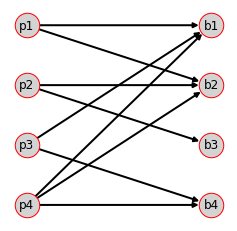

In [2]:
#G bipartite graph
G = nx.DiGraph()
G.add_edges_from([("p1","b1"), ("p1","b2"), ("p2","b2"), ("p2","b3"), ("p3","b1"), ("p3","b4"), ("p4","b1"), ("p4","b2"), ("p4","b4")])

#Draw the Bipartite Graph
fig, ax = plt.subplots(figsize=(4,4))

pos = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[1,2], "b2":[1,1], "b3":[1,0], "b4":[1,-1]}
nx.draw(G, pos, node_size = 600, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = 'black', edgecolors='red', ax=ax)

plt.savefig("plot2.1.svg", format="svg")

**B)** Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest. If a perfect matching exists, find at least a perfect matching.

Max flow:  (4, {'p1': {'b1': 0, 'b2': 1}, 'b1': {'d': 1}, 'b2': {'d': 1}, 'p2': {'b2': 0, 'b3': 1}, 'b3': {'d': 1}, 'p3': {'b1': 1, 'b4': 0}, 'b4': {'d': 1}, 'p4': {'b1': 0, 'b2': 0, 'b4': 1}, 's': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 'd': {}})


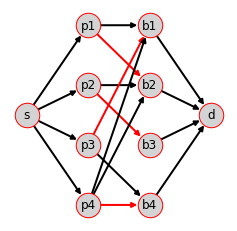

In [3]:
# add source and destionation to bipartite graph
dG = nx.DiGraph() 
dG.add_edges_from([("p1","b1"), ("p1","b2"), ("p2","b2"), ("p2","b3"), ("p3","b1"), ("p3","b4"), ("p4","b1"), ("p4","b2"), ("p4","b4")])
dG.add_edges_from([("s","p1"), ("s","p2"), ("s","p3"), ("s","p4"), ("b1","d"), ("b2", "d"), ("b3","d"), ("b4","d")])

# unitary capacity
dG["p1"]["b1"]['capacity']=1
dG["p1"]["b2"]['capacity']=1
dG["p2"]["b2"]['capacity']=1
dG["p2"]["b3"]['capacity']=1
dG["p3"]["b1"]['capacity']=1
dG["p3"]["b4"]['capacity']=1
dG["p4"]["b1"]['capacity']=1
dG["p4"]["b2"]['capacity']=1
dG["p4"]["b4"]['capacity']=1
dG["s"]["p1"]['capacity']=1
dG["s"]["p2"]['capacity']=1
dG["s"]["p3"]['capacity']=1
dG["s"]["p4"]['capacity']=1
dG["b1"]["d"]['capacity']=1
dG["b2"]["d"]['capacity']=1
dG["b3"]["d"]['capacity']=1
dG["b4"]["d"]['capacity']=1

# Max-flow of Graph
print("Max flow: ", nx.algorithms.flow.maximum_flow(dG, "s", "d"))

# draw graph
fig, ax = plt.subplots(figsize=(4,4))

edge_colors = ["black","red","black","black","black","red","black","red","black","black","black","black","red","black","black","black","black"]

pos = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[1,2], "b2":[1,1], "b3":[1,0], "b4":[1,-1], "s":[-1,0.5], "d":[2,0.5]}
nx.draw(dG, pos, node_size = 600, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = edge_colors, edgecolors='red', ax=ax)

plt.savefig("plot2.2.svg", format="svg")

**C)** Assume now that there are multiple copies of book, specifically the distribution of the number of copies is (2; 3; 2; 2), and there is no constraint on the number of books that each person can take. The only constraint is that each person can not take more copies of the same book. Use the analogy with max-flow problems to establish how many books of interest can be assigned in total.

Max flow:  (8, {'p1': {'b1': 0, 'b2': 1}, 'b1': {'d': 2}, 'b2': {'d': 3}, 'p2': {'b2': 1, 'b3': 1}, 'b3': {'d': 1}, 'p3': {'b1': 1, 'b4': 1}, 'b4': {'d': 2}, 'p4': {'b1': 1, 'b2': 1, 'b4': 1}, 's': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3}, 'd': {}})


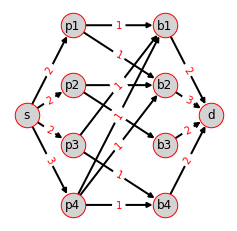

In [4]:
# weighted bipartite graph
G_weighted = nx.DiGraph()
G_weighted.add_edges_from([("p1","b1"), ("p1","b2"), ("p2","b2"), ("p2","b3"), ("p3","b1"), ("p3","b4"), ("p4","b1"), ("p4","b2"), ("p4","b4")])
G_weighted.add_edges_from([("s","p1"), ("s","p2"), ("s","p3"), ("s","p4"), ("b1","d"), ("b2", "d"), ("b3","d"), ("b4","d")])

# weighted capacity
G_weighted["p1"]["b1"]['capacity']=1
G_weighted["p1"]["b2"]['capacity']=1
G_weighted["p2"]["b2"]['capacity']=1
G_weighted["p2"]["b3"]['capacity']=1
G_weighted["p3"]["b1"]['capacity']=1
G_weighted["p3"]["b4"]['capacity']=1
G_weighted["p4"]["b1"]['capacity']=1
G_weighted["p4"]["b2"]['capacity']=1
G_weighted["p4"]["b4"]['capacity']=1
G_weighted["s"]["p1"]['capacity']=2
G_weighted["s"]["p2"]['capacity']=2
G_weighted["s"]["p3"]['capacity']=2
G_weighted["s"]["p4"]['capacity']=3
G_weighted["b1"]["d"]['capacity']=2
G_weighted["b2"]["d"]['capacity']=3
G_weighted["b3"]["d"]['capacity']=2
G_weighted["b4"]["d"]['capacity']=2

# Max-flow of Graph
print("Max flow: ", nx.algorithms.flow.maximum_flow(G_weighted,"s","d"))

# draw Graph
fig, ax = plt.subplots(figsize=(4,4))

edge_colors = ["black","black","black","black","black","black","black","black","black","black","black","black","black","black","black","black","black"]

pos = {"p1":[0,2], "p2":[0,1], "p3":[0,0], "p4":[0,-1], "b1":[2,2], "b2":[2,1], "b3":[2,0], "b4":[2,-1], "s":[-1,0.5], "d":[3,0.5]}
labels = nx.get_edge_attributes(G_weighted, 'capacity')
nx.draw_networkx_edge_labels(G_weighted,pos,edge_labels=labels, font_size=10, font_color='red')
nx.draw(dG, pos, node_size = 600, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = edge_colors, edgecolors='red', ax=ax)

plt.savefig("plot2.3.svg", format="svg")

**D)** Starting from point (c), suppose that the library can sell a copy of a book and buy a copy of another book. Which books should be sold and bought to maximize the number of assigned books?

In [5]:
nodes = G_weighted.nodes
edges = G_weighted.edges

for node_i in nodes:
    
    inflow = 0
    outflow = 0
    maxPossibleOutflow = 0
    
    # source node is not considered
    if node_i == "s": continue
        
    # inflow of destination node is the maximal possible flow of graph
    if node_i == "d":
         for u, v, data in G_weighted.in_edges(node_i, data=True):
            maxPossibleOutflow = sum(data.values()) + maxPossibleOutflow
    
    # calculate inflow of node_i
    for u, v, data in G_weighted.in_edges(node_i, data=True):
        inflow = sum(data.values()) + inflow
    
    # calculate outflow of node_i
    for u, v, data in G_weighted.out_edges(node_i, data=True):
        outflow = sum(data.values()) + outflow
    
    # netflow of node_i
    netflow = inflow - outflow
    
    # if some nodes has inflow greater or minor than outflow means that it has not an optimized flow
    if netflow != 0 and node_i != "s" and node_i != "d":
        print(f"Node {node_i} not optimized, netflow is {netflow}")
    
print("Max possible outflow: ", maxPossibleOutflow)

Node b1 not optimized, netflow is 1
Node b3 not optimized, netflow is -1
Max possible outflow:  9
